# Educational Attainment, Income, and Healthcare: County-Level Analysis in Arizona
* Purpose: This scatter plot visualizes the relationship between:
    * Income Ratio (x-axis): This is a measure comparing income levels. Higher values may indicate relatively higher-income populations. 
    * % Uninsured (y-axis): This shows the percentage of the populations without health insurance in each county. 
    
* Each dot in the plot represents a data point for a county, and it's positioned based on that county's income ratio and uninsured rate. 
* Insights:
    * You can see a slight upward trend that would suggest that as the income ratio becomes larger, the percentage of people that are uninsured is larger. 

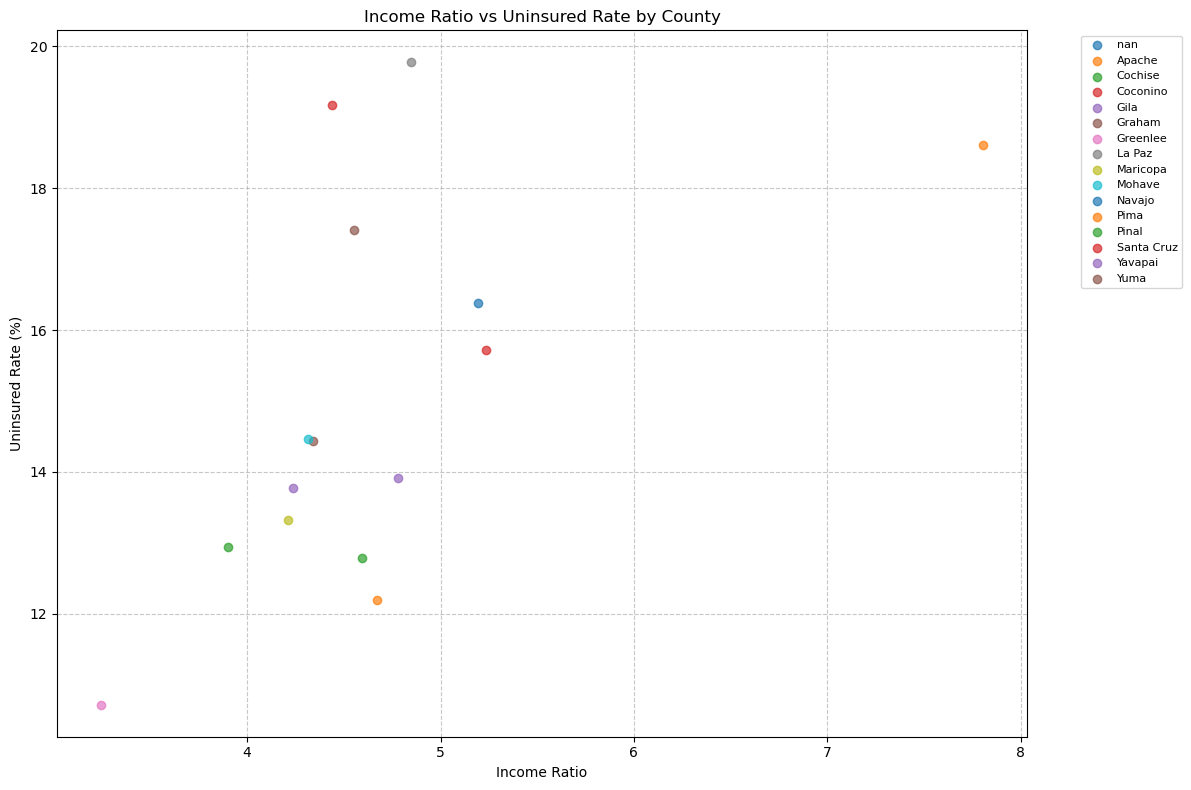

In [50]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12, 8))

# Loop through each county and plot its data
for county in df['County'].unique():
    county_data = df[df['County'] == county]
    plt.scatter(county_data['Income Ratio'], county_data['% Uninsured'], 
                label=county, alpha=0.7)

# Add labels, title, grid, and legend
plt.xlabel('Income Ratio')
plt.ylabel('Uninsured Rate (%)')
plt.title('Income Ratio vs Uninsured Rate by County')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
plt.tight_layout()
plt.show()


# Health Insurance Coverage by County in Arizona

* Purpose: This chart visualizes health insurance coverage by county in Arizona, using two stacked bars for each county:
     * Black Bar: Represents the percentage of insured individuals(calculated as 100% - % Uninsure).
     * Blue Bar: Represents the percentage of uninsured individuals(from the % Uninsured column).

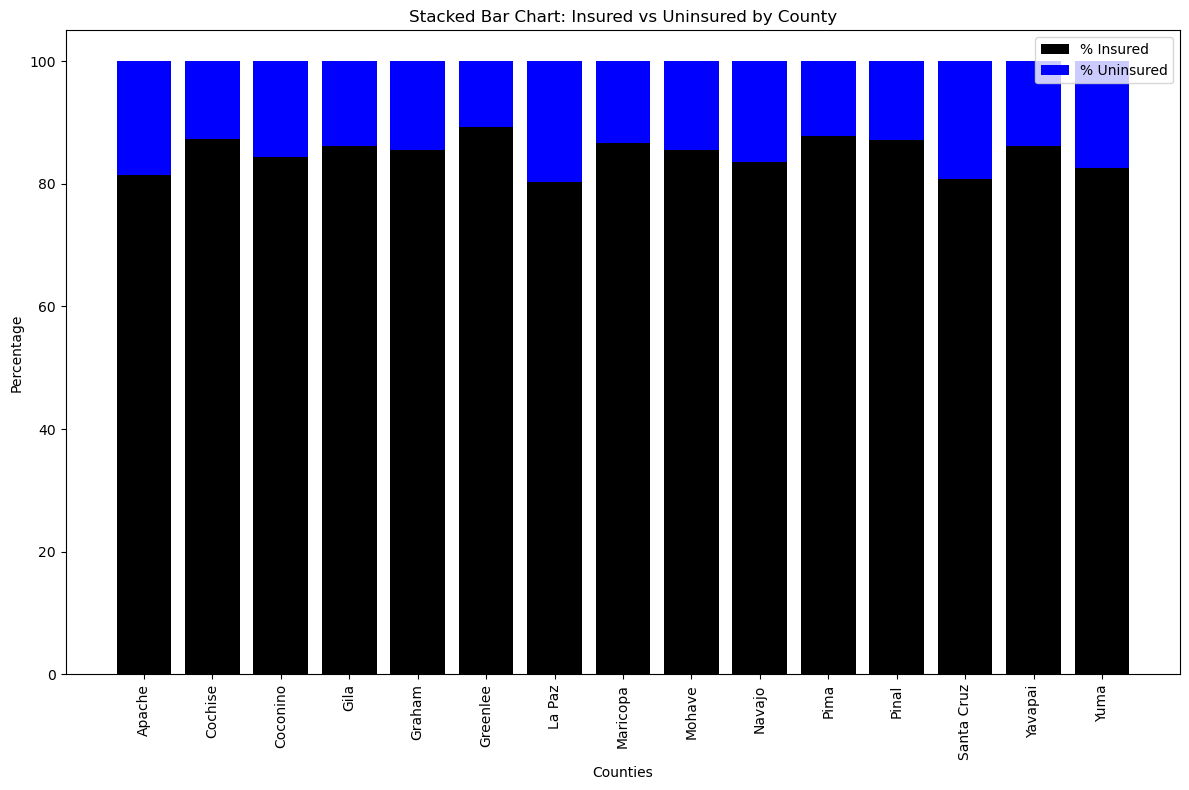

In [49]:
import numpy as np

df_filtered = df.dropna(subset=['County'])

counties = df_filtered['County']
insured = 100 - df_filtered['% Uninsured']

x = np.arange(len(counties))

plt.figure(figsize=(12, 8))

plt.bar(x, insured, label='% Insured', color='black')
plt.bar(x, df_filtered['% Uninsured'], bottom=insured, label='% Uninsured', color='blue')

plt.xticks(x, counties, rotation=90)

plt.xlabel('Counties')
plt.ylabel('Percentage')
plt.title('Stacked Bar Chart: Insured vs Uninsured by County')

plt.legend()
plt.tight_layout()
plt.show()

# Education vs Health Coverage: County-Level Comparison in Arizona
* Purpose: This scatter plot explored the relationship between education and health insurance coverage in Arizona counties.
* Each dot represents one county, and is plotted using:
        * X-axis (% Some College): The percentage of people in that county who have had soe college education but may not have earned a degree. 
        * Y-axis (% Uninsuure): The percentage of people in that county who do not have health insurance. 
* Insights:
    * The downward trend from left to right suggests that as the percent of people with some college increases, the percent of unincured people decreases.
    * The could mean that people with more education is associated with better health coverage. 
        

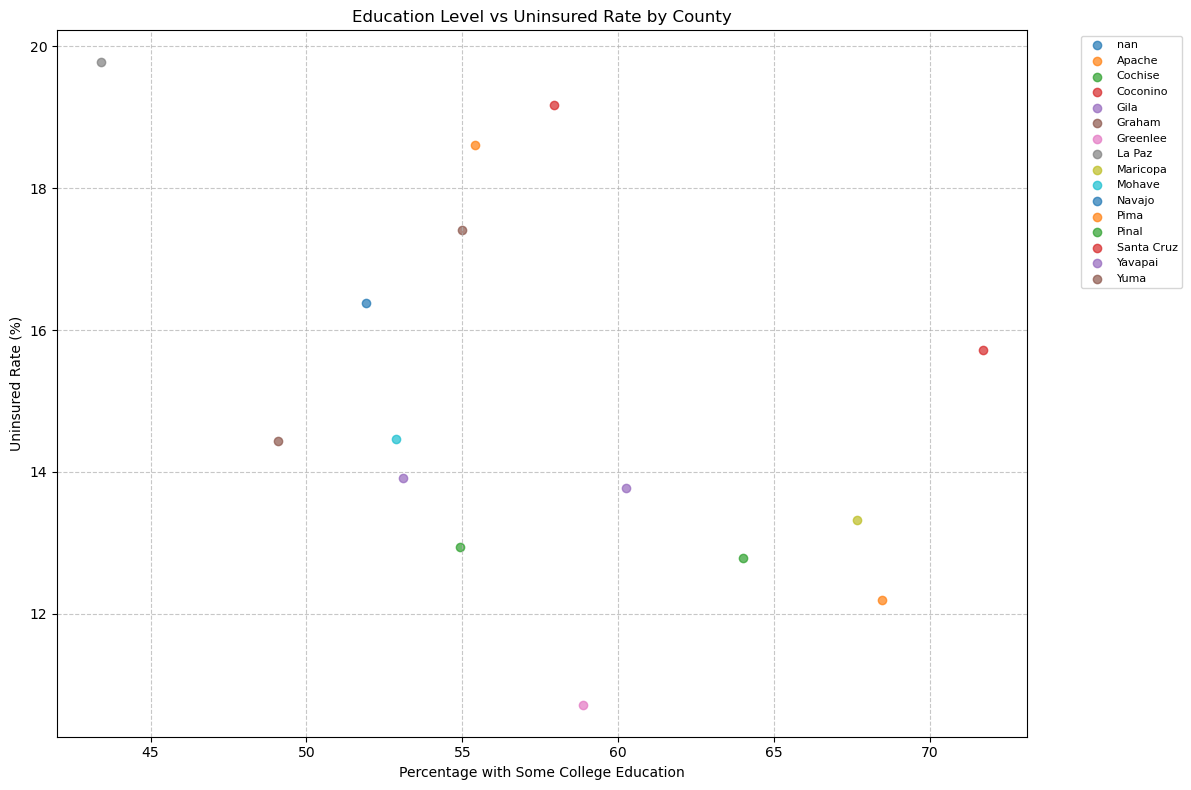

In [51]:
plt.figure(figsize=(12, 8))

for county in df['County'].unique():
    county_data = df[df['County'] == county]
    plt.scatter(county_data['% Some College'], county_data['% Uninsured'], 
                label=county, alpha=0.7)

plt.xlabel('Percentage with Some College Education')
plt.ylabel('Uninsured Rate (%)')
plt.title('Education Level vs Uninsured Rate by County')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
plt.tight_layout()
plt.show()


# Regression Analysis and Model Evaluation

* Target (Y): Years of Potential Life Lost Rate

* Predictors (X):

   % Completed High School (education)

  
   % Children in Poverty (income/poverty)

  
     Income Ratio (income inequality)

In [16]:
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Dataset
df = pd.read_excel("Project.xlsx", sheet_name="Cleaned Data for Arizona")

# Relevant columns
cols = ["Years of Potential Life Lost Rate", "% Completed High School", "% Children in Poverty", "Income Ratio"]
data = df[cols].dropna()

# X and y
X = data[["% Completed High School", "% Children in Poverty", "Income Ratio"]]
y = data["Years of Potential Life Lost Rate"]

# Add constant 
X = sm.add_constant(X)

# Fit regression model
model = sm.OLS(y, X).fit()

# Regression summary  
print(model.summary())


                                    OLS Regression Results                                   
Dep. Variable:     Years of Potential Life Lost Rate   R-squared:                       0.652
Model:                                           OLS   Adj. R-squared:                  0.565
Method:                                Least Squares   F-statistic:                     7.507
Date:                               Mon, 24 Mar 2025   Prob (F-statistic):            0.00433
Time:                                       17:27:22   Log-Likelihood:                -146.72
No. Observations:                                 16   AIC:                             301.4
Df Residuals:                                     12   BIC:                             304.5
Df Model:                                          3                                         
Covariance Type:                           nonrobust                                         
                              coef    std err          t    

C:\Users\korey\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=16 observations were given.
  return hypotest_fun_in(*args, **kwds)


# Addressing Small Sample Limitations: Visualizing Residuals for Model Assumption Checks

RMSE: 2323.54
R² Score: 0.652


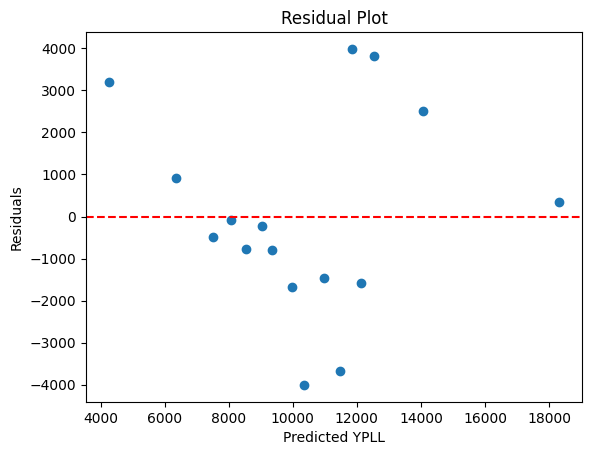

In [17]:
# Predictions
y_pred = model.predict(X)

# Evaluation metrics
rmse = np.sqrt(mean_squared_error(y, y_pred))
r2 = r2_score(y, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.3f}")

# Residual plot
residuals = y - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted YPLL")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


# Hypothesis and Analysis Summary

### Hypothesis  
Higher educational attainment → higher income → better healthcare outcomes (lower YPLL)

---

### Analysis Summary

This project investigates whether higher levels of education lead to improved healthcare outcomes across Arizona counties, with income as a possible mediator.

### Key Findings from OLS Regression:

- **% Completed High School**
  - Coefficient: +219.5  
  - p-value: 0.242  
  - *Not statistically significant*  
  - *Interpretation:* Educational attainment alone did not significantly predict health outcomes in this sample.

- **% Children in Poverty**
  - Coefficient: +317.6  
  - p-value: 0.046  
  - *Statistically significant*  
  - *Interpretation:* Counties with higher poverty had significantly worse healthcare outcomes (higher YPLL).

- **Income Ratio (Inequality)**
  - Coefficient: +1714.1  
  - p-value: 0.096  
  - *Marginally significant*  
  - *Interpretation:* Higher income inequality may be associated with worse health outcomes.

---

# Conclusion

While education alone was not a statistically significant predictor of healthcare outcomes, **poverty was**, suggesting that **income is a critical pathway** through which education may impact health. These findings **partially support the hypothesis**, highlighting the need for further research into how education indirectly influences healthcare via socioeconomic status.


